In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from warnings import filterwarnings
filterwarnings('ignore')

In [135]:
df = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')

In [136]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [137]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [139]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [140]:
# dropping unecessary id column
df = df.drop('id', axis = 1)

In [141]:
# There are greatly imbalanced classes with 95% of the participants having no stroke and 5% having stroke.

In [142]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [143]:
df['stroke'].value_counts(normalize='True')

0    0.951272
1    0.048728
Name: stroke, dtype: float64

#### Filling BMI Missing Values

In [144]:
# Missing bmi values
df['bmi'].isna().sum()

201

In [145]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [146]:
# Mean of bmi
bmi_mean = df['bmi'].mean()
bmi_mean

28.893236911794673

In [147]:
# Median of bmi
bmi_median = df['bmi'].median()
bmi_median

28.1

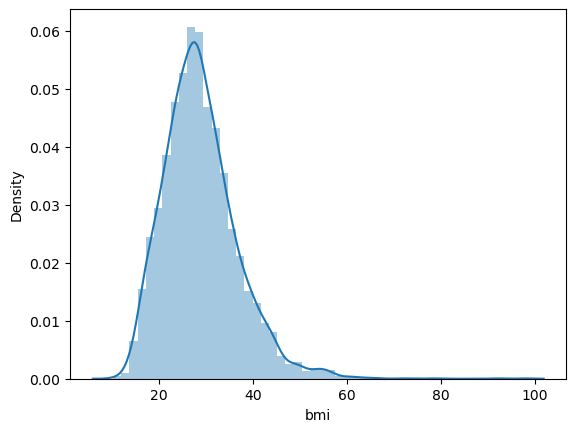

In [148]:
# Checking bmi distribution
sns.distplot(df.bmi);

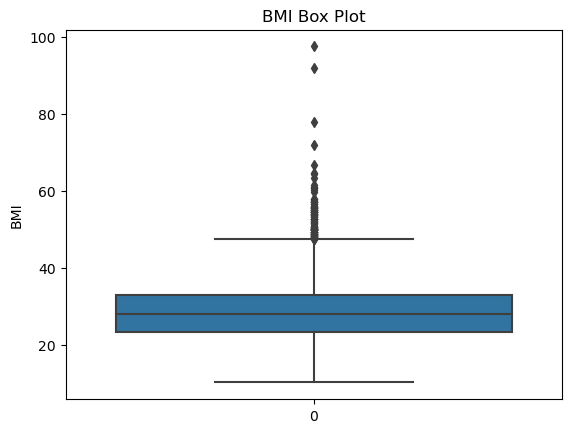

In [149]:
# Checking bmi distribution
sns.boxplot(df.bmi)
plt.title('BMI Box Plot')
plt.ylabel('BMI');

plt.savefig('../images/bmi_boxplot.png')

There seems to be some skewdness to the right so will fill NAs with median 

In [150]:
df['bmi'] = df['bmi'].fillna(bmi_median)

# No missing bmi values
df['bmi'].isna().sum()

0

### Data Exploration

#### Least Correlated Categorical Feature with Stroke

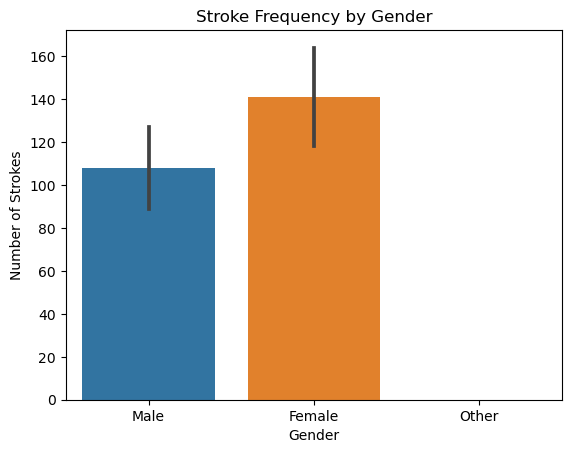

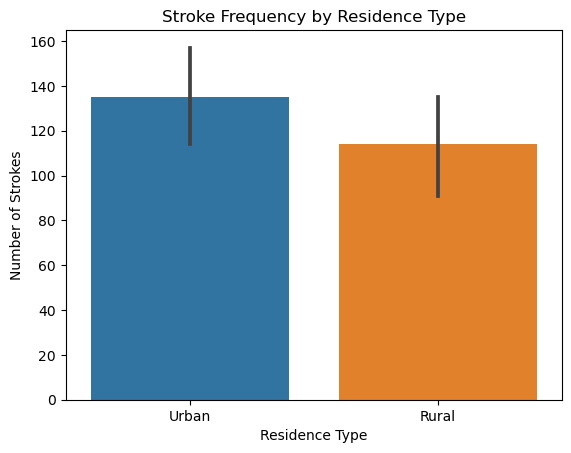

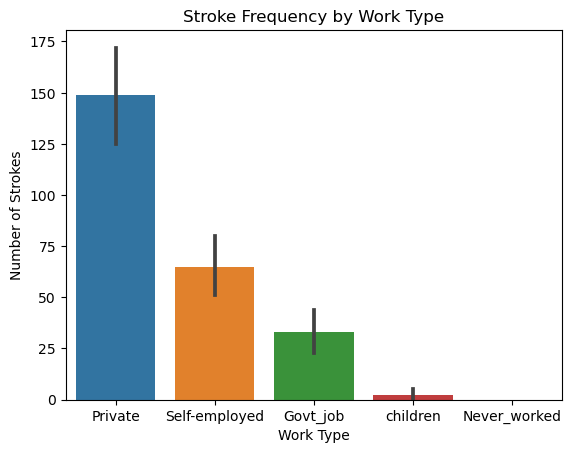

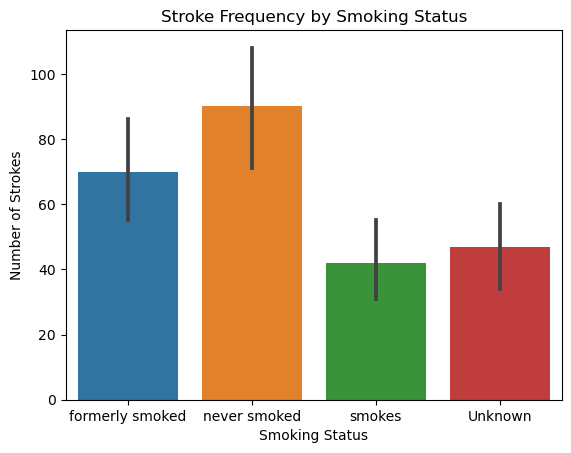

In [151]:
sns.barplot(x='gender', y='stroke', data=df, estimator=sum)
plt.title('Stroke Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Strokes')
plt.show()

sns.barplot(x='Residence_type', y='stroke', data=df, estimator=sum)
plt.title('Stroke Frequency by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Number of Strokes')
plt.show()

sns.barplot(x='work_type', y='stroke', data=df, estimator=sum)
plt.title('Stroke Frequency by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Number of Strokes')
plt.show()

sns.barplot(x='smoking_status', y='stroke', data=df, estimator=sum)
plt.title('Stroke Frequency by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Strokes')
plt.show()


#### Most Highly Correlated Categorical Features with Stroke

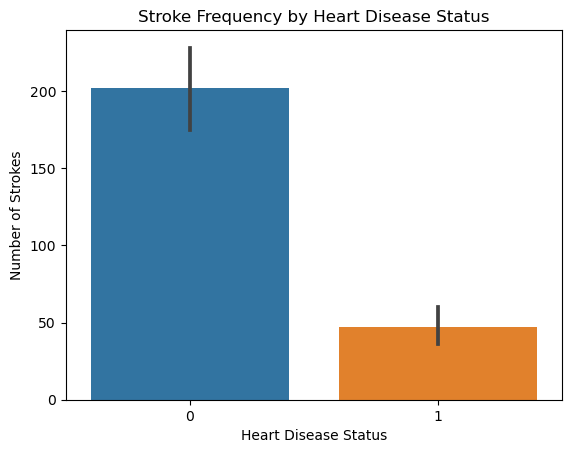

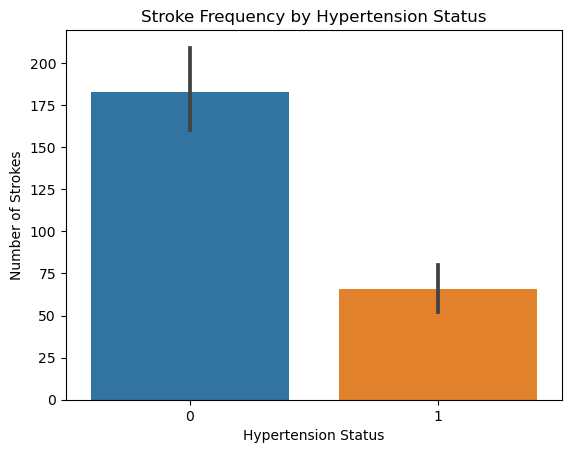

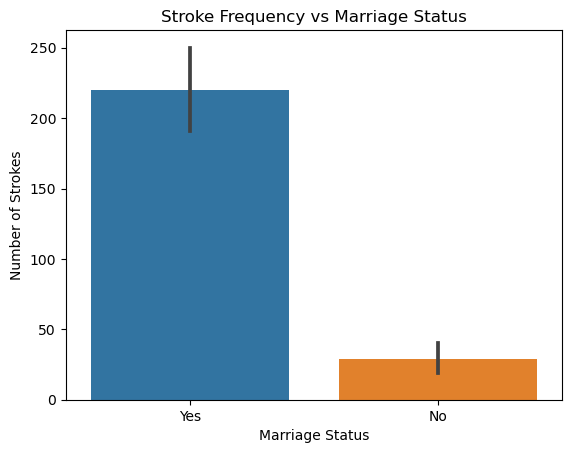

In [152]:
sns.barplot(x='heart_disease', y='stroke', data=df, estimator=sum)
plt.title('Stroke Frequency by Heart Disease Status')
plt.xlabel('Heart Disease Status')
plt.ylabel('Number of Strokes')
plt.show()

sns.barplot(x='hypertension', y='stroke', data=df, estimator=sum)
plt.title('Stroke Frequency by Hypertension Status')
plt.xlabel('Hypertension Status')
plt.ylabel('Number of Strokes')
plt.show()

sns.barplot(x='ever_married', y='stroke', data=df, estimator=sum)
plt.title('Stroke Frequency vs Marriage Status')
plt.xlabel('Marriage Status')
plt.ylabel('Number of Strokes')

plt.savefig('../images/heart_hypertension_married_hist.png');

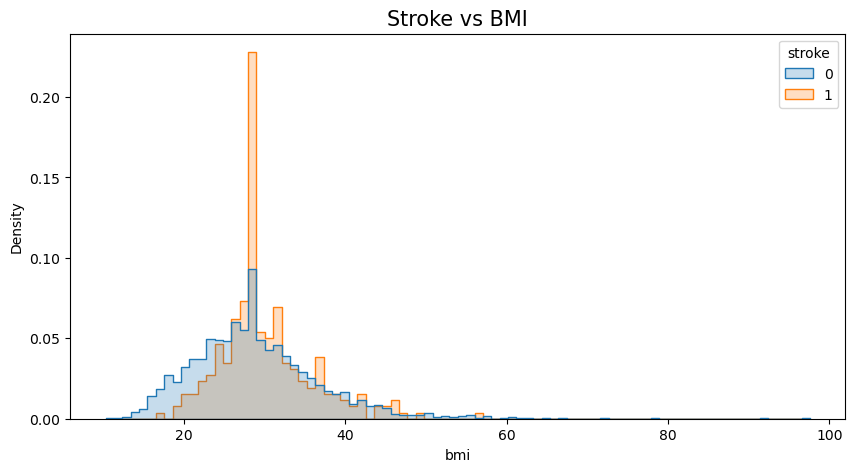

In [153]:
plt.figure(figsize=(10,5))
sns.histplot(
    df, x="bmi", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Stroke vs BMI', fontsize=15)
plt.show()

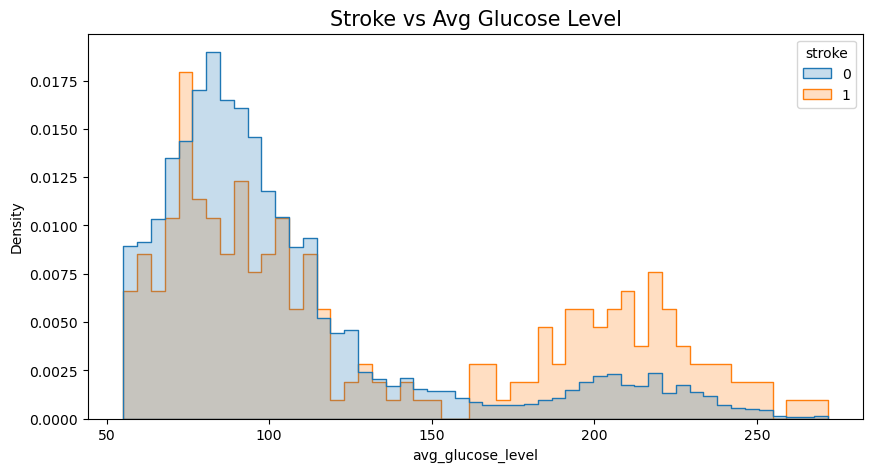

In [154]:
plt.figure(figsize=(10,5))
sns.histplot(
    df, x="avg_glucose_level", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Stroke vs Avg Glucose Level', fontsize=15)

plt.savefig('../images/glucose_hist.png');

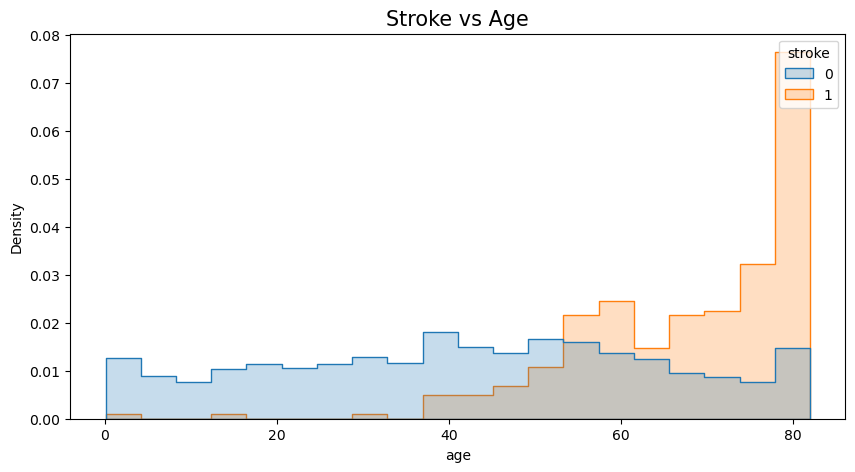

In [155]:
plt.figure(figsize=(10,5))
sns.histplot(
    df, x="age", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Stroke vs Age', fontsize=15)

plt.savefig('../images/age_hist.png');

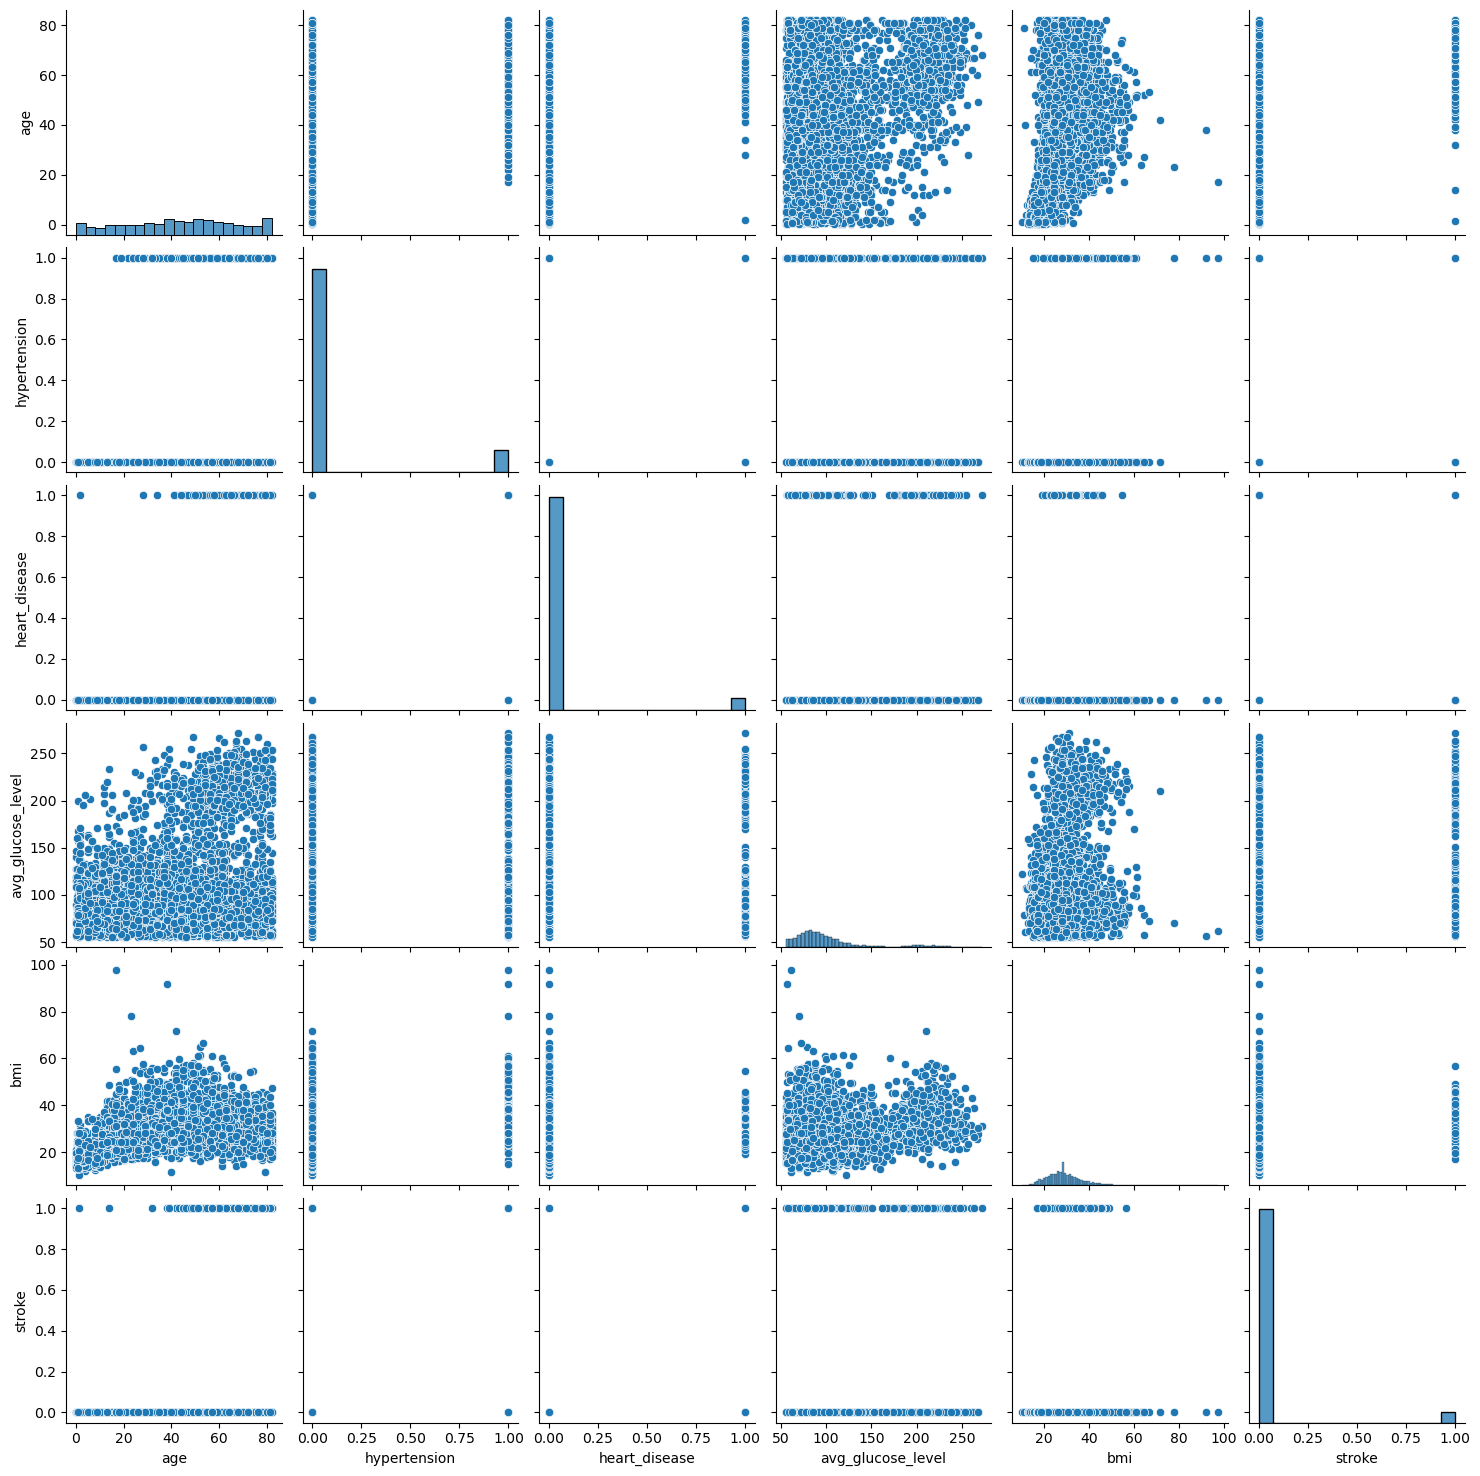

In [156]:
sns.pairplot(df)

In [157]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [158]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [159]:
# Create Dummies 
# Only object columns

object_col = df.select_dtypes(include='object').columns

df = pd.get_dummies(df, columns=object_col, prefix_sep='_', drop_first=True)

In [160]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


Except for Age/Marriage there isnt significant multi-collinearity among features.

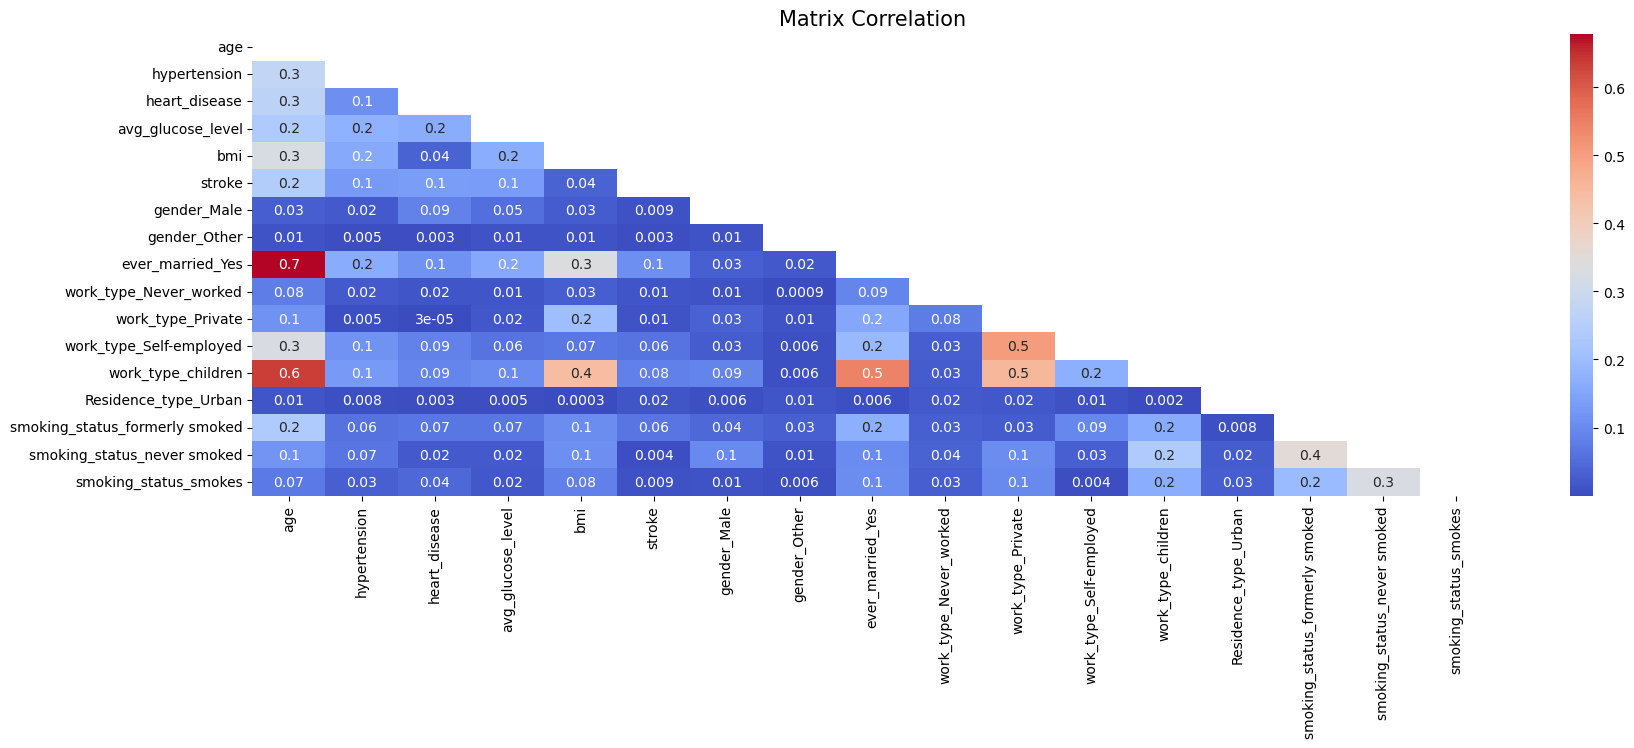

In [161]:
# DF Matrix Correlation.
df_corr = abs(df.corr())

# Matrix Plot.
plt.subplots(figsize=(20,6))
sns.heatmap(df_corr, annot=True, fmt='.1g', cmap='coolwarm', cbar=True, mask=np.triu(df_corr))
plt.title('Matrix Correlation', fontsize=15)
plt.show()

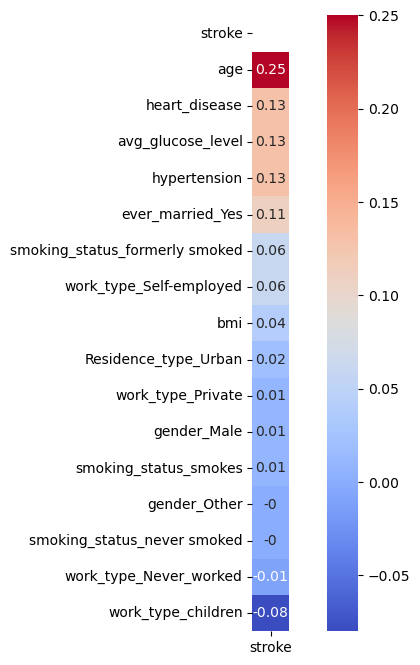

In [164]:
# Establish size of figure.
plt.figure(figsize = (10,8))

# Get correlation of variables.
corr = round(df.corr()[['stroke']].sort_values(by= 'stroke', ascending=False).head(25), 2)

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr,
            mask = mask,
            square = True,
            cmap = 'coolwarm',
            annot = True);

plt.savefig('../images/feature_corr.png')

In [ ]:
df.to_csv('./data/cleaned_data.csv')